# Perceptron
----
**Overview**：Perceptron (perceptron) is a binary linear model whose input is a feature vector and output is a category.Perceptron works by dividing the data into positive and negative hyperplanes. It is arguably the most basic classifier in machine learning.

----
## Artificial Neuron as Mathematic Notation
In general terms, an input X is multiplied by a weight W and added a bias b producing the net activation. 
<img style="max-width:60%;max-height:60%;" src="https://miro.medium.com/max/1290/1*-JtN9TWuoZMz7z9QKbT85A.png">

We can summarize an artificial neuron with the following mathematical expression:
$$
\hat{y} = f\left(\text{net}\right)= f\left(\vec{w}\cdot\vec{x}+b\right) = f\left(\sum_{i=1}^{n}{w_i x_i + b}\right)
$$

-------
### Basic Neuron 
$$
\hat{y} = f\left(\vec{w}\cdot\vec{x} + b) = f( w_{1}x_{1} + w_2x_{2} + \cdots + w_nx_{n}+b\right)\,
$$

After that, we update the weights and the bias using as:

$$
\hat{w_i} = w_i + \alpha (y - \hat{y}) x_{i} \,,\  i=1,\ldots,n\,;\\
$$
$$
\hat{b} = b + \alpha (y - \hat{y})\,.
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# generate the separable data

In [1]:

def generate_separable_data(N):
    np.random.seed(2333)  # for reproducibility
    w = np.random.uniform(-1, 1, 2)
    b = np.random.uniform(-1, 1)
    X = np.random.uniform(-1, 1, [N, 2])
    y = np.sign(np.inner(w, X)+b)
    return X,y,w,b

# generate the non separable data

In [2]:
def generate_non_separable_data(N):
    np.random.seed(2333)  # for reproducibility
    w = np.random.uniform(-1, 1, 2)
    b = np.random.uniform(-1, 1)
    X = np.random.uniform(-1, 1, [N, 2])
    y = np.sign(np.inner(w, X)+b)
    for i in range(len(y)):
        if y[i] == -1:
            y[i] = 1
            break
            
    return X,y,w,b

# Plot function

In [4]:
#plot the data 
def plot_data(X, y, w, b) :
    fig = plt.figure(figsize=(4,4))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    a = -w[0]/w[1]
    pts = np.linspace(-1,1)
    plt.plot(pts, a*pts-(b/w[1]), 'k-')
    cols = {1: 'r', -1: 'b'}
    for i in range(len(X)): 
        plt.plot(X[i][0], X[i][1], cols[y[i]]+'o')
    plt.show()

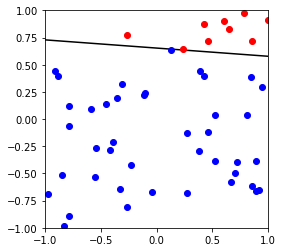

In [5]:
X,y,w,b = generate_separable_data(50)
plot_data(X, y, w,b)

# Perceptron Algorithm Implementation

In [6]:
class Perceptron :
 
    """An implementation of the perceptron algorithm."""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
 
    def fit(self, X, y) :
        X = self.add_bias(X,y)
        
        self.w = np.zeros(len(X[0]))

        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
            iterations += 1
        self.converged = converged
        plot_data(X[:,1:], y, self.w[1:],self.w[0])
        if converged :
            print ('converged in %d iterations ' % iterations)
        else:
            print ('cannot converged in %d iterations ' % iterations)

        print ('weight vector: ' + str(self.w))

    def decision_function(self, x) :
        return np.inner(self.w, x)

    def predict(self, X) :
        scores = np.inner(self.w, X)
        return np.sign(scores)
    
    def add_bias(self,X,y):
        a = np.ones(X.shape[0])
        X = np.insert(X, 0, values=a, axis=1)
        return X
    def error(self,X,y):
        num = 0
        err_sco = self.predict(X)
        num =sum (err_sco!=y)
        return num/len(X)

# Result of classifying different kind of data

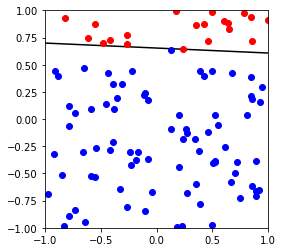

converged in 41 iterations 
weight vector: [-1.          0.07009608  1.53050105]


In [7]:
X,y,w,b = generate_separable_data(100)
p = Perceptron()
p.fit(X,y)

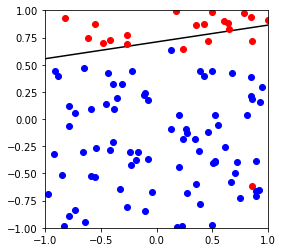

cannot converged in 101 iterations 
weight vector: [-0.4        -0.08723007  0.56359207]


In [8]:
X,y,w,b = generate_non_separable_data(100)
p = Perceptron()
p.fit(X,y)

# Conclusion
As we can see in the figure above, Perceptron does not perform well for non separable data.